In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import seaborn as sns
import rasterio as rio
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import disco_tif.process_sb_tiff
import disco_tif.hillshades_pca
#import disco_tif.geotiff_plotting
import disco_tif.write_mapfile

In [4]:
import datetime
def nowTime():
    return datetime.datetime.now().strftime("%H:%M:%S")
def now():
    return datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
def snow():
    return datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
def today():
    return datetime.datetime.now().strftime("%Y-%m-%d")
def stoday():
    return datetime.datetime.now().strftime("%Y%m%d")

In [5]:
tiff_dir = os.getcwd()

single_band_tiff_path = os.path.abspath('../example_data/E020N40/E020N40.tif')

single_band_tiff_path

'/Users/bbloss/EMeraldCodes/disco-tif/example_data/E020N40/E020N40.tif'

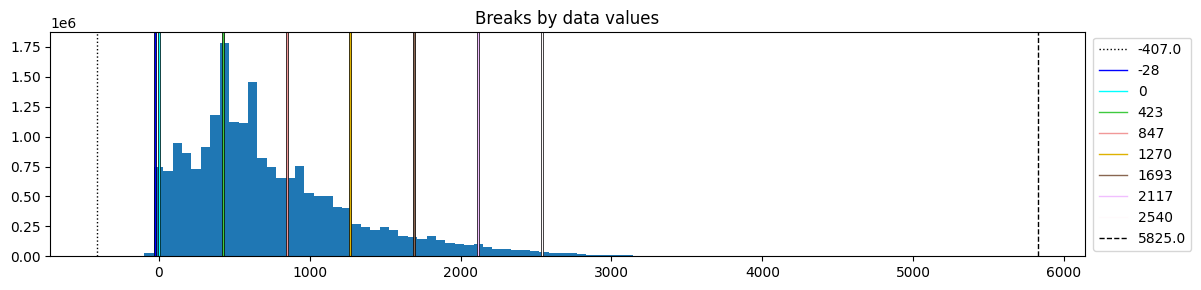


GIS software compatible color look up table successfully written to: 
	- /Users/bbloss/EMeraldCodes/disco-tif/example_data/E020N40/E020N40_EMeraldCustomTerrain_-28_to_2540_pseudo_linear_qgis_color_table_8-colors_20240514.txt

New single-channel colorized geotiff written to: 
	- '/Users/bbloss/EMeraldCodes/disco-tif/example_data/E020N40/E020N40_EMeraldCustomTerrain_-28_to_2540_pseudo_linear.tif'



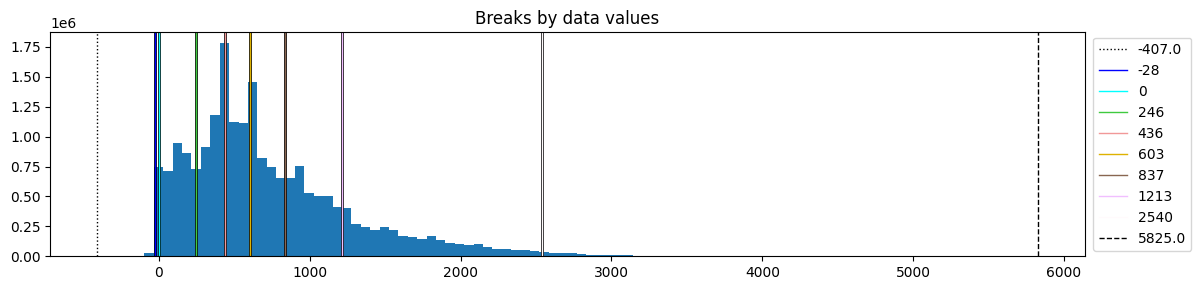


GIS software compatible color look up table successfully written to: 
	- /Users/bbloss/EMeraldCodes/disco-tif/example_data/E020N40/E020N40_EMeraldCustomTerrain_-28_to_2540_pseudo_hist_norm_qgis_color_table_8-colors_20240514.txt

New single-channel colorized geotiff written to: 
	- '/Users/bbloss/EMeraldCodes/disco-tif/example_data/E020N40/E020N40_EMeraldCustomTerrain_-28_to_2540_pseudo_hist_norm.tif'



In [6]:
method_list = ['pseudo_linear', 'pseudo_hist_norm']
for method in method_list:
    ph_colormap, ph_data_breaks, ph_new_file_paths = disco_tif.process_sb_tiff.make_rgba_tiff_from_single_Band(single_band_tiff_path,
                                                                                                               #data_min_max=datarange,
                                                                                                               cmap_method=method,
                                                                                                               )


In [7]:
hs_azimuths, hs_altitudes = disco_tif.hillshades_pca.build_hs_az_al(start_al=30, al_inc=30, num_al_angles=2,
                                                                    start_az=90, num_az_angles=8)

azimuths = [0, 45, 90, 135, 180, 225, 270, 315]
altitudes = [30, 60]


In [8]:
hillshades, pcaComponents = disco_tif.hillshades_pca.build_hillshade(single_band_tiff_path=single_band_tiff_path,
                                                                     data_min_max=[min(ph_data_breaks), max(ph_data_breaks)],
                                                                     hs_azimuths=hs_azimuths,
                                                                     hs_altitudes=hs_altitudes,
                                                                     cmap=ph_colormap,
                                                                     process_pca=True)

New single-channel geotiff generated successfully: '/Users/bbloss/EMeraldCodes/disco-tif/example_data/E020N40/E020N40_hillshade_az000_al30.tif'
New single-channel geotiff generated successfully: '/Users/bbloss/EMeraldCodes/disco-tif/example_data/E020N40/E020N40_hillshade_az000_al60.tif'
New single-channel geotiff generated successfully: '/Users/bbloss/EMeraldCodes/disco-tif/example_data/E020N40/E020N40_hillshade_az045_al30.tif'
New single-channel geotiff generated successfully: '/Users/bbloss/EMeraldCodes/disco-tif/example_data/E020N40/E020N40_hillshade_az045_al60.tif'
New single-channel geotiff generated successfully: '/Users/bbloss/EMeraldCodes/disco-tif/example_data/E020N40/E020N40_hillshade_az090_al30.tif'
New single-channel geotiff generated successfully: '/Users/bbloss/EMeraldCodes/disco-tif/example_data/E020N40/E020N40_hillshade_az090_al60.tif'
New single-channel geotiff generated successfully: '/Users/bbloss/EMeraldCodes/disco-tif/example_data/E020N40/E020N40_hillshade_az135_al

In [9]:
writeLUTs=True
writeTifs=True
writeHillshades=True

mapfile_path = f"{single_band_tiff_path.split('.tif')[0]}"
if writeLUTs:
    mapfile_path = f"{mapfile_path}_LUT"
if writeTifs:
    mapfile_path = f"{mapfile_path}_AuxTif"
if writeHillshades:
    mapfile_path = f"{mapfile_path}_HS"


mapfile_path = f"{mapfile_path}.map"

mapfile_path

'/Users/bbloss/EMeraldCodes/disco-tif/example_data/E020N40/E020N40_LUT_AuxTif_HS.map'

In [10]:
disco_tif.write_mapfile.generate_LUT_based_mapfile(single_band_tiff_path, mapfile_path, writeLUTs=True, writeTifs=True, writeHillshades=True)

## Mapfile written on 2024-05-14 at 09:27:32
MAP
    NAME "E020N40"
    EXTENT 20.0 -10.0 60.0 40.0
    SIZE 4800 6000
    PROJECTION
        "init=EPSG:4326"  # Set the EPSG code
    END

    WEB
        METADATA
          'wms_title'          'E020N40'
          'wms_enable_request' '*'
          'wms_srs'            'EPSG:4326'
        END 
    END
    
    LAYER
        NAME "E020N40"
        DATA "E020N40.tif"
        TYPE RASTER
        STATUS ON
        EXTENT 20.0 -10.0 60.0 40.0
        PROJECTION
            "init=EPSG:4326"
        END
        PROCESSING "NODATA=-9999"  # Set your desired Nodata value
        PROCESSING "LUT=-407:0, 5825:255"  # Define the LUT (elevation:color)
    END
    
    LAYER
        NAME "E020N40_EMeraldCustomTerrain_-28_to_2540_pseudo_hist_norm_uint8_9-colors_20240509"
        DATA "E020N40.tif"
        TYPE RASTER
        STATUS ON
        EXTENT 20.0 -10.0 60.0 40.0
        PROJECTION
            "init=EPSG:4326"
        END
        PROCESSING "B